# Soal 2 - Exploratory Data Analysis (EDA)

##### by Fardhina Amalia | JCDS 1204

### FA SUPERMARKET

### Introduction
`FA SUPERMARKET` memiliki 3 cabang supermarket, yaitu `A` yang berada di kota `Yangon`,`B` berada di kota `Mandalay`, dan `C` berada di kota `Naypitaw`.  `FA SUPERMARKET` menjual beberapa kategori produk seperti `Health and beauty, Electronic accessories,Home and lifestyle,Sports and travel,Food and beverages, Fashion accessories`.  `FA SUPERMARKET` Memiliki 2 kategori pelanggan, yaitu customer `normal` dan `member`.

### Goals
- Meningkatkan angka penjualan 
- Meningkatkan jumlah member baru yang bergabung
- Meningkatkan keberhasilan campaign marketing perusahaan

### Rumusan masalah
- Bagaimana gross income  bulan Januari-Maret 2019 dari ketiga cabang FA Supermarket?
- Bagaimana pola transaksi customer?


#### Import Common Package

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

#### Import Dataset

In [2]:
df=pd.read_csv('supermarket.csv')
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


#### Melihat tipe data

In [3]:
df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

#### Describe data 

In [4]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.220360e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [5]:
df.describe(include='O')

,Invoice ID,Branch,City,Customer type,Gender,Product line,Date,Time,Payment
count,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,1000,3,3,2,2,6,89,506,3
top,291-21-5991,A,Yangon,Member,Female,Fashion accessories,2/7/2019,19:48,Ewallet
freq,1,340,340,501,501,178,20,7,345


In [6]:
### 

#### Handling missing values

In [7]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

##### tidak ada missing values jadi bisa dilanjutkan ke tahap selanjutnya

### Handling Outliers

<Figure size 1080x720 with 0 Axes>

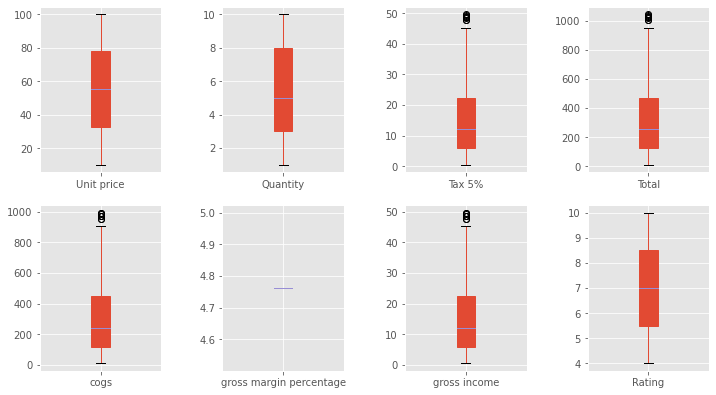

In [8]:
# subplots
plt.figure(figsize=(15,10))
df.plot(subplots=True, layout=(4,4), kind='box', figsize=(12,14), patch_artist=True)
plt.subplots_adjust(wspace=0.5);
plt.show()

##### Melihat outliers kolom total

In [9]:
##cari data outliers pada kolom Total
Q1=df['Total'].describe()['25%']
Q3=df['Total'].describe()['75%']
IQR=Q3-Q1
Upper_Fence = Q3 + (1.5 * IQR)
Lower_Fence = Q1 - (1.5 * IQR)

In [10]:
#### Cek Data Outliers
df[(df['Total'] < Lower_Fence) | (df['Total'] > Upper_Fence)] # membaca data frame yang mengandung data outliers dari kolom 'Total' 

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
166,234-65-2137,C,Naypyitaw,Normal,Male,Home and lifestyle,95.58,10,47.790,1003.590,1/16/2019,13:32,Cash,955.8,4.761905,47.790,4.8
167,687-47-8271,A,Yangon,Normal,Male,Fashion accessories,98.98,10,49.490,1039.290,2/8/2019,16:20,Credit card,989.8,4.761905,49.490,8.7
350,860-79-0874,C,Naypyitaw,Member,Female,Fashion accessories,99.30,10,49.650,1042.650,2/15/2019,14:53,Credit card,993.0,4.761905,49.650,6.6
357,554-42-2417,C,Naypyitaw,Normal,Female,Sports and travel,95.44,10,47.720,1002.120,1/9/2019,13:45,Cash,954.4,4.761905,47.720,5.2
422,271-88-8734,C,Naypyitaw,Member,Female,Fashion accessories,97.21,10,48.605,1020.705,2/8/2019,13:00,Credit card,972.1,4.761905,48.605,8.7
557,283-26-5248,C,Naypyitaw,Member,Female,Food and beverages,98.52,10,49.260,1034.460,1/30/2019,20:23,Ewallet,985.2,4.761905,49.260,4.5
699,751-41-9720,C,Naypyitaw,Normal,Male,Home and lifestyle,97.50,10,48.750,1023.750,1/12/2019,16:18,Ewallet,975.0,4.761905,48.750,8.0
792,744-16-7898,B,Mandalay,Normal,Female,Home and lifestyle,97.37,10,48.685,1022.385,1/15/2019,13:48,Credit card,973.7,4.761905,48.685,4.9
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.690,1022.490,3/2/2019,17:16,Ewallet,973.8,4.761905,48.690,4.4


In [11]:
95.58*10*0.05+(95.58*10)

1003.5899999999999

##### karena ini bukan sebuah kesalahan penulisan maka data ini normal

### Ekstrasi Waktu

In [12]:
df['time_date']=df['Date']+' ' + df['Time']
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,time_date
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,1/5/2019 13:08
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,3/8/2019 10:29
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,3/3/2019 13:23
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,1/27/2019 20:33
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,2/8/2019 10:37


In [13]:
df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
time_date                   object
dtype: object

In [14]:
#ubah tipe data time_date
df['time_date']=pd.to_datetime(df['time_date'])

In [15]:
df.dtypes

Invoice ID                         object
Branch                             object
City                               object
Customer type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                            int64
Tax 5%                            float64
Total                             float64
Date                               object
Time                               object
Payment                            object
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
time_date                  datetime64[ns]
dtype: object

In [16]:
#Menghapus kolom date dan time
#del df['Time']
#del df['Date']

In [17]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating', 'time_date'],
      dtype='object')

In [18]:
df['time_date']

0     2019-01-05 13:08:00
1     2019-03-08 10:29:00
2     2019-03-03 13:23:00
3     2019-01-27 20:33:00
4     2019-02-08 10:37:00
              ...        
995   2019-01-29 13:46:00
996   2019-03-02 17:16:00
997   2019-02-09 13:22:00
998   2019-02-22 15:33:00
999   2019-02-18 13:28:00
Name: time_date, Length: 1000, dtype: datetime64[ns]

#### ektrasi kolom df['time_date']

In [19]:
date_dt=df['time_date'].dt

In [20]:
#ambil bulan berupa nama
df['month']=date_dt.month_name()

##ambil data tanggal berupa angka
df['date']=date_dt.day

#ambil nama hari
df['name_day']=date_dt.day_name()

#ambil jam
df['hour']=date_dt.hour


In [22]:
df['month'].unique() #Transaksi bulan Januari - Februari - Maret

array(['January', 'March', 'February'], dtype=object)

In [23]:
#mengurutkan bulan
mon=['January','February','March']
df['month']=pd.Categorical(df['month'],categories=mon,ordered=True)

In [24]:
df['month'].unique()

[January, March, February]
Categories (3, object): [January < February < March]

In [25]:
df['name_day'].unique()

array(['Saturday', 'Friday', 'Sunday', 'Monday', 'Thursday', 'Wednesday',
       'Tuesday'], dtype=object)

In [26]:
day=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
df['name_day']=pd.Categorical(df['name_day'],categories=day,ordered=True)

In [27]:
df['name_day'].unique()

[Saturday, Friday, Sunday, Monday, Thursday, Wednesday, Tuesday]
Categories (7, object): [Monday < Tuesday < Wednesday < Thursday < Friday < Saturday < Sunday]

In [28]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Payment,cogs,gross margin percentage,gross income,Rating,time_date,month,date,name_day,hour
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,Ewallet,522.83,4.761905,26.1415,9.1,2019-01-05 13:08:00,January,5,Saturday,13
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,Cash,76.40,4.761905,3.8200,9.6,2019-03-08 10:29:00,March,8,Friday,10
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,...,Credit card,324.31,4.761905,16.2155,7.4,2019-03-03 13:23:00,March,3,Sunday,13
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,...,Ewallet,465.76,4.761905,23.2880,8.4,2019-01-27 20:33:00,January,27,Sunday,20
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,...,Ewallet,604.17,4.761905,30.2085,5.3,2019-02-08 10:37:00,February,8,Friday,10


In [29]:
pd.crosstab(index=df['hour'],columns='jumlah_transaksi')

col_0,jumlah_transaksi
hour,
10,101
11,90
12,89
13,103
14,83
15,102
16,77
17,74
18,93


In [67]:
# Fungsi mengkategorikan waktu belanja berdasarkan 
# https://wawasan85.blogspot.com/2016/11/batas-waktu-pagi-siang-sore-pada-jam.html
def func(row): 
    if row['hour'] >= 5 and row['hour'] <= 10 :
        val = "05.00-10.59"
    if row['hour'] > 10 and row['hour'] < 15 : 
        val = "10.00-14.59"
    if row['hour'] >= 15 and row['hour'] <= 18 : 
        val = "15.00-18.59"
    if row['hour'] >= 19 and row['hour'] <= 23 : #diatas umur 75 tahun
        val = "19.00-23.59"
    return val

In [68]:
#membuat kolom waktu sesuai fungsi diatas
df['waktu'] = df.apply(func, axis=1)

In [69]:
def func(row): 
    if row['name_day'] in ['Monday','Tuesday','Wednesday','Thursday','Friday']:
        val = "Weekday"
    if row['name_day'] in ['Sunday','Saturday']:
        val = "Weekend"
    return val

In [70]:
#membuat kolom waktu sesuai fungsi diatas
df['minggu'] = df.apply(func, axis=1)

In [71]:
df.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,...,cogs,gross margin percentage,gross income,Rating,month,date,name_day,hour,waktu,minggu
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,...,522.83,4.761905,26.1415,9.1,January,5,Saturday,13,10.00-14.59,Weekend
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,...,76.40,4.761905,3.8200,9.6,March,8,Friday,10,05.00-10.59,Weekday
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,...,324.31,4.761905,16.2155,7.4,March,3,Sunday,13,10.00-14.59,Weekend
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,...,465.76,4.761905,23.2880,8.4,January,27,Sunday,20,19.00-23.59,Weekend
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,...,604.17,4.761905,30.2085,5.3,February,8,Friday,10,05.00-10.59,Weekday


In [72]:
# df = df.drop(columns = ['Invoice ID', 'time_date'])
df.columns

Index(['Branch', 'City', 'Customer type', 'Gender', 'Product line',
       'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date', 'Time', 'Payment',
       'cogs', 'gross margin percentage', 'gross income', 'Rating', 'month',
       'date', 'name_day', 'hour', 'waktu', 'minggu'],
      dtype='object')

# Univariate Analysis 

#### Melihat transaksi paling banyak terjadi di cabang dan kota apa?

In [36]:
pd.crosstab(index=[df['Branch'],df['City']],columns='jumlah_quantity',values=df['Quantity'],aggfunc='sum',margins=True)


,col_0,jumlah_quantity,All
Branch,City,,
A,Yangon,1859,1859
B,Mandalay,1820,1820
C,Naypyitaw,1831,1831
All,,5510,5510


##### Insight
- Cabang A berada di kota `Yangon`
- Cabang B berada di kota `Mandalay`
- Cabang C berada dikota `Naypyitaw`
- Kolom cabang sudah mewakili kota

### `Total product yang terjual di tahun 2019 bulan Januari-Maret adalah 5510 unit`

In [120]:
df.groupby(['Branch']).agg(jumlah_transaksi=('Quantity','count'),sum_quantity=('Quantity','sum'),sum_gro_income=('gross income','sum'),mean_gro_income=('gross income','mean'))


,jumlah_transaksi,sum_quantity,sum_gro_income,mean_gro_income
Branch,,,,
A,340,1859,5057.1605,14.874001
B,332,1820,5057.0320,15.232024
C,328,1831,5265.1765,16.052367


##### insight
- Jumlah transaksi dan kuantitas barang yang terjual paling tinggi di `Cabang A`
- Jumlah gross_income pada `Cabang A` dan `Cabang B` memiliki nilai yang sama
- Walaupun jumlah transaksi paling sedikit di `Cabang C` namun `Cabang C` memiliki jumlah gross_income yang tertinggi

In [38]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating', 'time_date', 'month', 'date', 'name_day', 'hour', 'waktu',
       'minggu'],
      dtype='object')

In [122]:
df.groupby(['Customer type']).agg(jumlah_transaksi=('Quantity','count'),sum_quantity=('Quantity','sum'),sum_gro_income=('gross income','sum'),mean_gro_income=('gross income','mean'))


,jumlah_transaksi,sum_quantity,sum_gro_income,mean_gro_income
Customer type,,,,
Member,501,2785,7820.164,15.609110
Normal,499,2725,7559.205,15.148707


##### insight
- Untuk Customer type member dan normal tidak terjadi perbedaan yang significant dalam jumlah transaksi


In [40]:
df.groupby(['Branch','Customer type','Gender']).agg(jumlah_transaksi=('Quantity','count'),sum_quantity=('Quantity','sum'),sum_gro_income=('gross income','sum')).sort_values('sum_gro_income')


jumlah_transaksi  sum_quantity  sum_gro_income
Branch Customer type Gender                                                
C      Member        Male                  73           349       1058.4685
A      Normal        Male                  92           451       1235.0855
B      Normal        Female                77           432       1241.8030
                     Male                  90           464       1257.8630
A      Normal        Female                81           444       1267.9095
       Member        Female                80           465       1268.7175
C      Normal        Male                  77           433       1269.3050
B      Member        Female                85           479       1278.5920
                     Male                  80           445       1278.7740
A      Member        Male                  87           499       1285.4480
C      Normal        Female                82           501       1287.2390
       Member        Female                96           548       1650.1640

##### insight
- Untuk Sum_gro_income paling tinggi dan penjualan barang paling tinggi didapat dari `cabang C` oleh `Member` yang bergender `Female` hal ini sangat berbanding terbalik dengan `member` yang bergender `male` di cabang yang sama.

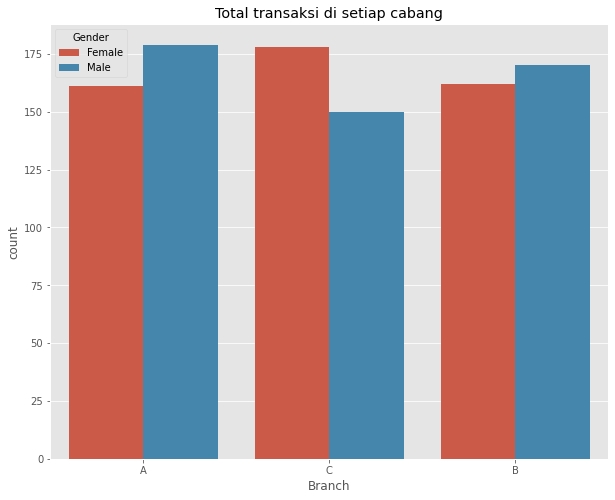

In [77]:
plt.figure(figsize=(10,8))
sns.countplot(x='Branch' ,data=df, hue='Gender')
plt.title("Total transaksi di setiap cabang")
plt.show()

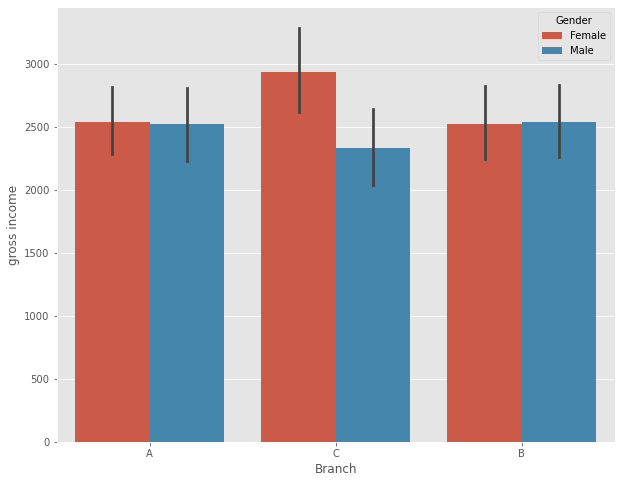

In [79]:
plt.figure(figsize=(10,8))
sns.barplot(x='Branch', y='gross income', data=df, estimator=np.sum,hue='Gender')
plt.show()

In [83]:
pd.crosstab(index=df['Gender'], columns='jumlah_gross_income',values=df['gross income'],aggfunc='sum',margins=True, normalize=True)

col_0,jumlah_gross_income,All
Gender,,
Female,0.519815,0.519815
Male,0.480185,0.480185
All,1.000000,1.000000


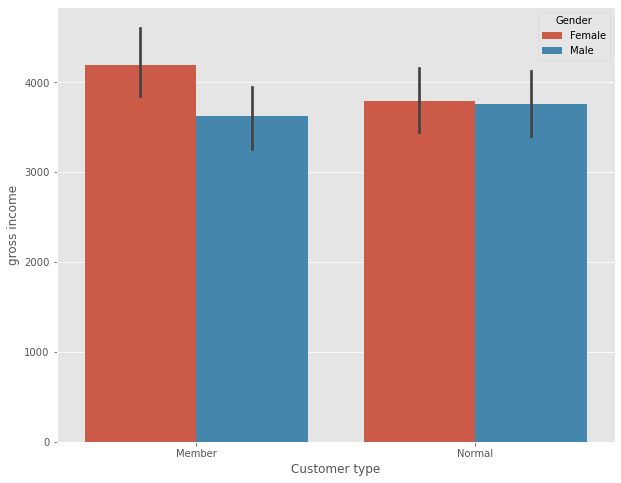

In [84]:
plt.figure(figsize=(10,8))
sns.barplot(x='Customer type', y='gross income', data=df, estimator=np.sum,hue='Gender')
plt.show()

In [89]:
pd.crosstab(index=[df['Customer type'],df['Gender']], columns='jumlah_gross_income',values=df['gross income'],aggfunc='sum',margins=True, normalize=True)*100

col_0                 jumlah_gross_income         All
Customer type Gender                                 
Member        Female            27.292885   27.292885
              Male              23.555521   23.555521
Normal        Female            24.688604   24.688604
              Male              24.462990   24.462990
All                            100.000000  100.000000

#### insight :
- Transaksi yang dilakukan di cabang A dan B lebih banyak dilakukan oleh bergender Male
- Transaksi yang dilakukan di cabang C lebih banyak dilakukan oleh bergender female
- 51.98% dari total gross income dari gender female ( 27.3% Member, 24.68% Normal)
- 

##### Kesimpulan Pertama
- Di seluruh cabang supermarket, customer yang bertipe `member atau normal` dan bergender `Female` memang `lebih konsumif` dibanding Male 

In [99]:
df.columns

Index(['Branch', 'City', 'Customer type', 'Gender', 'Product line',
       'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date', 'Time', 'Payment',
       'cogs', 'gross margin percentage', 'gross income', 'Rating', 'month',
       'date', 'name_day', 'hour', 'waktu', 'minggu'],
      dtype='object')

In [45]:
df.groupby('Product line',as_index=False).agg({'Unit price':'mean'}).sort_values('Unit price')
# df.groupby(['Customer type']).agg(jumlah_transaksi=('Quantity','count'),sum_quantity=('Quantity','sum'),sum_gro_income=('gross income','sum'))


,Product line,Unit price
0,Electronic accessories,53.551588
3,Health and beauty,54.854474
4,Home and lifestyle,55.316937
2,Food and beverages,56.008851
5,Sports and travel,56.993253
1,Fashion accessories,57.153652


In [46]:
df_1= df.groupby('Product line',as_index=False).sum()
df_1

,Product line,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,date,hour
0,Electronic accessories,9103.77,971,2587.5015,54337.5315,51750.03,809.523810,2587.5015,1177.2,2759,2548
1,Fashion accessories,10173.35,902,2585.9950,54305.8950,51719.90,847.619048,2585.9950,1251.2,2717,2680
2,Food and beverages,9745.54,952,2673.5640,56144.8440,53471.28,828.571429,2673.5640,1237.7,2645,2677
3,Health and beauty,8337.88,854,2342.5590,49193.7390,46851.18,723.809524,2342.5590,1064.5,2373,2260
4,Home and lifestyle,8850.71,911,2564.8530,53861.9130,51297.06,761.904762,2564.8530,1094.0,2287,2312
5,Sports and travel,9460.88,920,2624.8965,55122.8265,52497.93,790.476190,2624.8965,1148.1,2475,2433


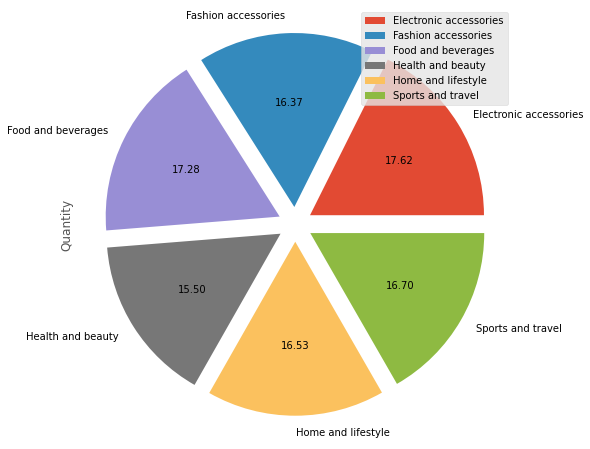

In [47]:
### Pandas

df_1.plot.pie(y = 'Quantity', 
                  labels=df_1['Product line'], 
                  figsize=(10,8), 
                  autopct='%.2f', 
                  explode=(0.1,0.1,0.1,0.1,0.1,0.1))
# plt.title("Average Total Bill per Day")
plt.show()

#### insight 
- Produk yang paling banyak dibeli adalah kategori `Electronic Acc` dan yang paling sedikit `Health and beauty`
- jumlah `gross income` paling banyak di dapat dari kategori `food and baverages` sejumlah 2673.5640
- Perbedaan penjualan antar produk tidak terlalu sginificant yaitu sehingga bs dikatakan merata berdasarkan QTY
- Rata-rata harga paling mahal ada di ketgori `Fashion Accessories`

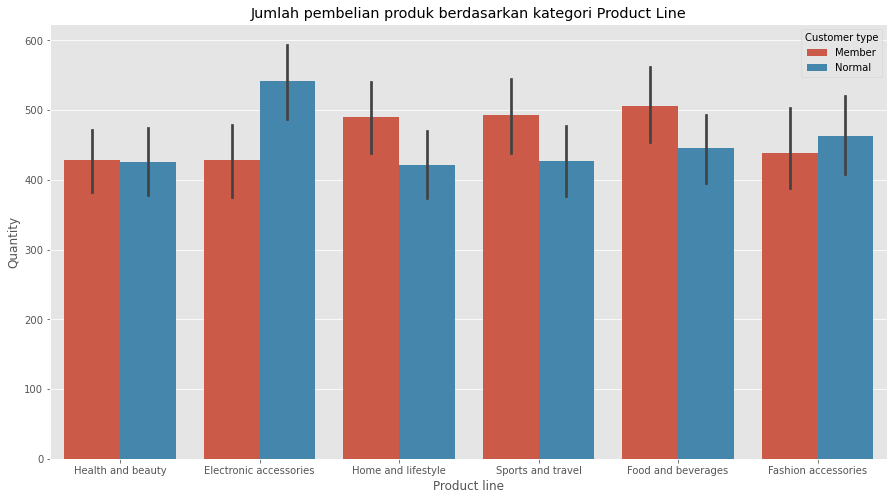

In [115]:
plt.figure(figsize=(15,8))
sns.barplot(x='Product line', y='Quantity', data=df, estimator=np.sum,hue='Customer type')
plt.title("Jumlah pembelian produk berdasarkan kategori Product Line")
plt.show()

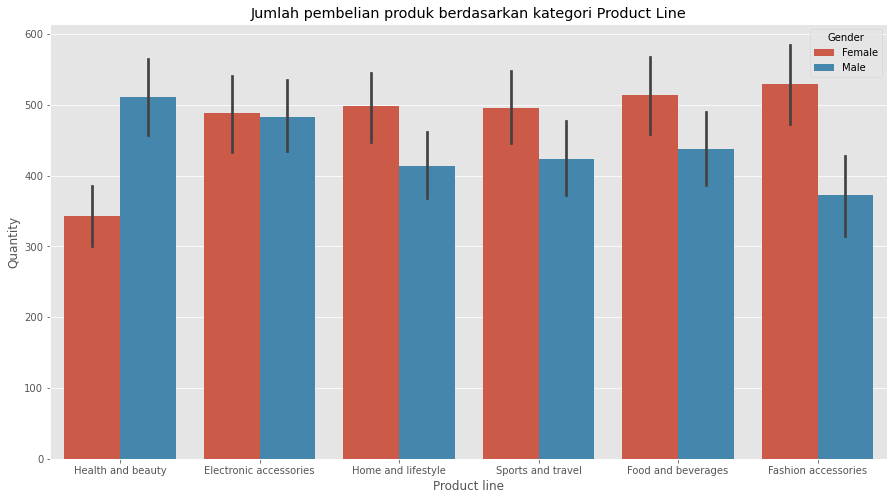

In [114]:
plt.figure(figsize=(15,8))
sns.barplot(x='Product line', y='Quantity', data=df, estimator=np.sum,hue='Gender')
plt.title("Jumlah pembelian produk berdasarkan kategori Product Line")
plt.show()

#### insight 
- Hampir di setiap kategori jumlah produk paling banyak dibeli oleh gender Female, kecuali `Health and beauty` paling banyak dibeli oleh gender male.
##### hipotesa : Beliin untuk kekasihnya atau orang tersayangnya

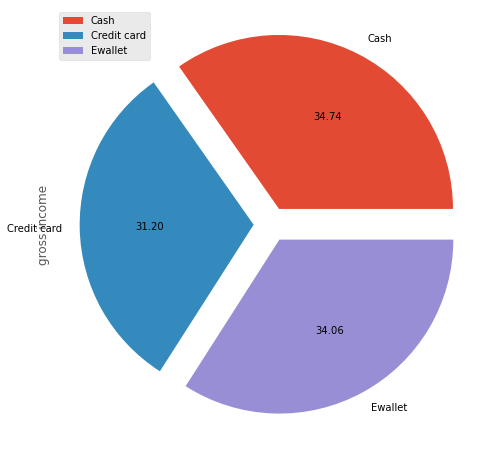

In [49]:
### Pandas
df_2= df.groupby('Payment',as_index=False).sum()
df_2.plot.pie(y = 'gross income', 
                  labels=df_2['Payment'], 
                  figsize=(10,8), 
                  autopct='%.2f', 
                  explode=(0.1,0.1,0.1))
# plt.title("Average Total Bill per Day")
plt.show()

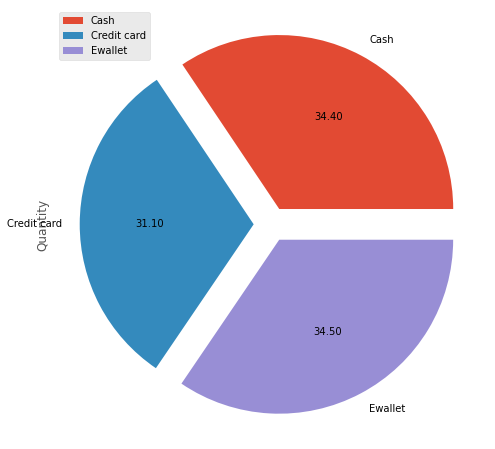

In [50]:
### Pandas
df_2= df.groupby('Payment',as_index=False).count()
df_2.plot.pie(y = 'Quantity', 
                  labels=df_2['Payment'], 
                  figsize=(10,8), 
                  autopct='%.2f', 
                  explode=(0.1,0.1,0.1))
# plt.title("Average Total Bill per Day")
plt.show()

##### insight
- Customer lebih banyak membayar menggunakan Ewallet dan cash dibanding CC

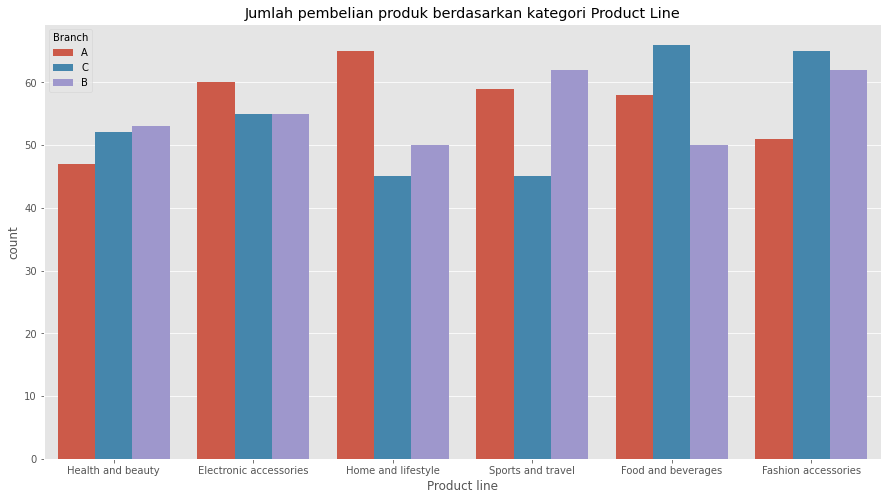

In [102]:
plt.figure(figsize=(15,8))
sns.countplot(df['Product line'],hue=df['Branch'])
plt.title("Jumlah pembelian produk berdasarkan kategori Product Line")
plt.show()

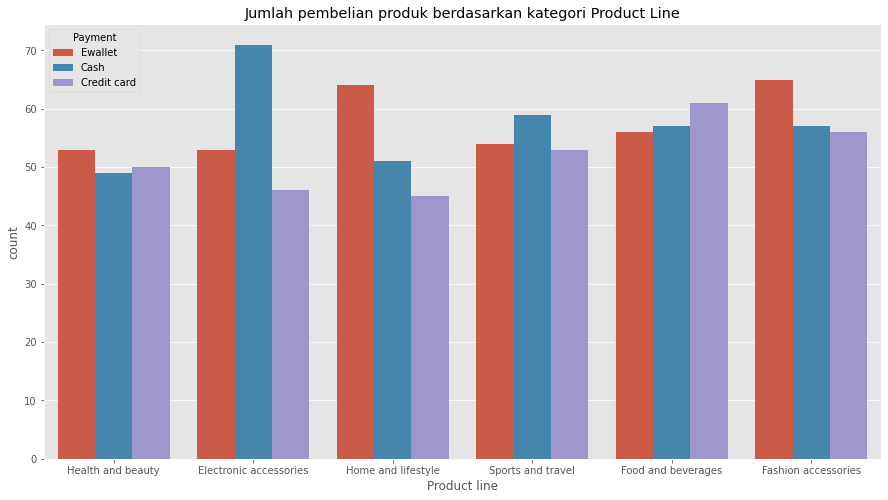

In [51]:
plt.figure(figsize=(15,8))
sns.countplot(df['Product line'],hue=df['Payment'])
plt.title("Jumlah pembelian produk berdasarkan kategori Product Line")
plt.show()

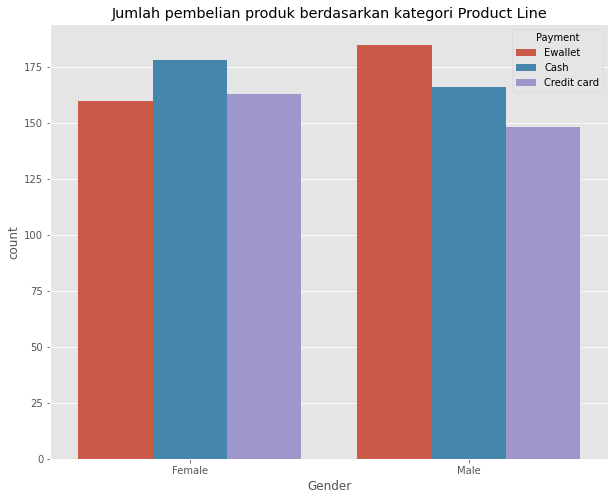

In [105]:
plt.figure(figsize=(10,8))
sns.countplot(df['Gender'],hue=df['Payment'])
plt.title("Jumlah pembelian produk berdasarkan kategori Product Line")
plt.show()

##### insight
- Cust lebih banyak menggunakan `Cash` untuk membeli produk `Electronic Acc` dan `Sports and travel`
- Cust lebih banyak menggunakan `Ewallet` untuk membeli produk `Health and beauty`,`Home and lifestyle`, and `Fashion Accessories`
- Cust lebih banyak menggunakan ` CC` untuk membeli produk `Food and beverages`

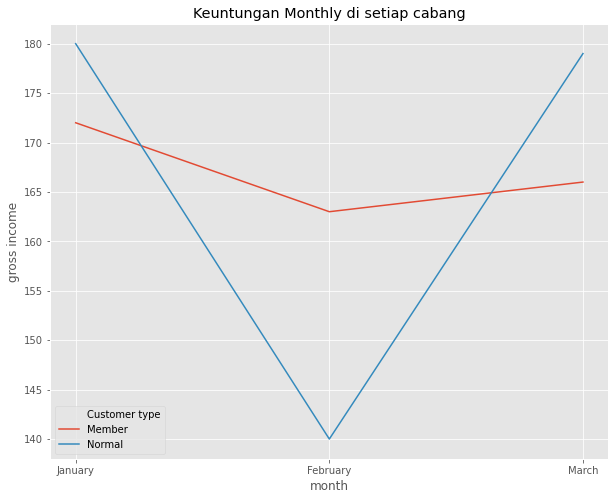

In [118]:
df1=df.groupby(['month','Customer type'],as_index=False).count()
plt.figure(figsize=(10,8))
sns.lineplot(data=df1, x ='month', y='gross income', hue='Customer type')
plt.title("Keuntungan Monthly di setiap cabang")
plt.show()

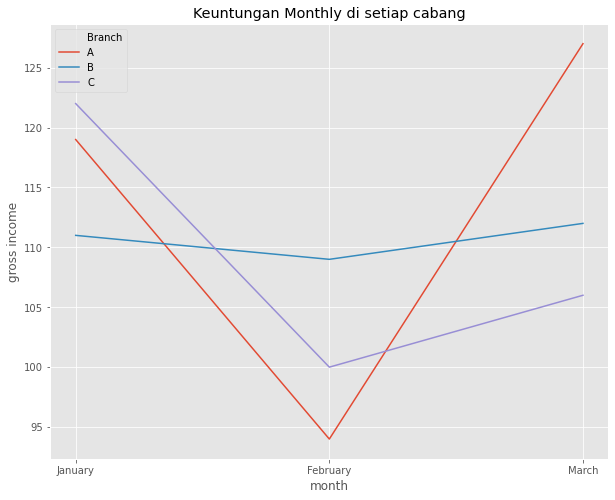

In [119]:
df1=df.groupby(['month','Branch'],as_index=False).count()
plt.figure(figsize=(10,8))
sns.lineplot(data=df1, x ='month', y='gross income', hue='Branch')
plt.title("Keuntungan Monthly di setiap cabang")
plt.show()

#### Ketiga cabang memiliki pola keuntungan yang sama. 
- januari merupakan angka penjualan tertinggi
- februari mengalami penurunan
- maret mengalami perbaikan


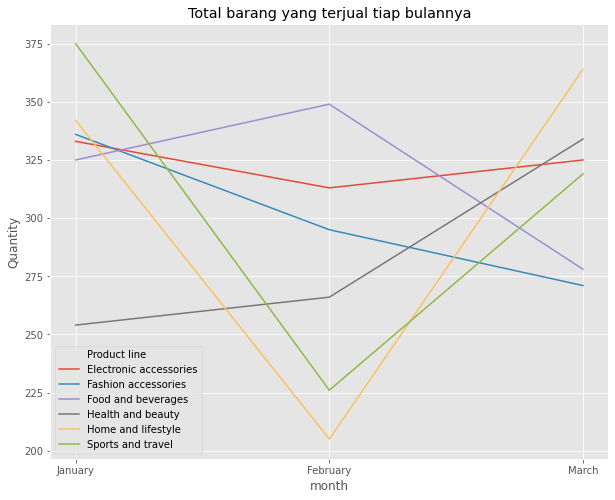

In [95]:
df1=df.groupby(['month','Product line'],as_index=False).sum()
## Seaborn
plt.figure(figsize=(10,8))
sns.lineplot(data=df1, x ='month', y='Quantity', hue='Product line')
plt.title('Total barang yang terjual tiap bulannya')
plt.show()

#### insight
- keenam kategori produk memiliki polayang berbeda:
    1. Electronic cenderung stabil
    2. Health n beauty cenderung meningkat
    3. Hme&lifestyle, sport travel memiliki pola yang sama
    4. Fashion Acc cenderung menurun
    5. FnB kebalikan dengan HMEdan lifestyle

In [128]:
df.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,...,cogs,gross margin percentage,gross income,Rating,month,date,name_day,hour,waktu,minggu
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,...,522.83,4.761905,26.1415,9.1,January,5,Saturday,13,10.00-14.59,Weekend
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,...,76.40,4.761905,3.8200,9.6,March,8,Friday,10,05.00-10.59,Weekday
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,...,324.31,4.761905,16.2155,7.4,March,3,Sunday,13,10.00-14.59,Weekend
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,...,465.76,4.761905,23.2880,8.4,January,27,Sunday,20,19.00-23.59,Weekend
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,...,604.17,4.761905,30.2085,5.3,February,8,Friday,10,05.00-10.59,Weekday


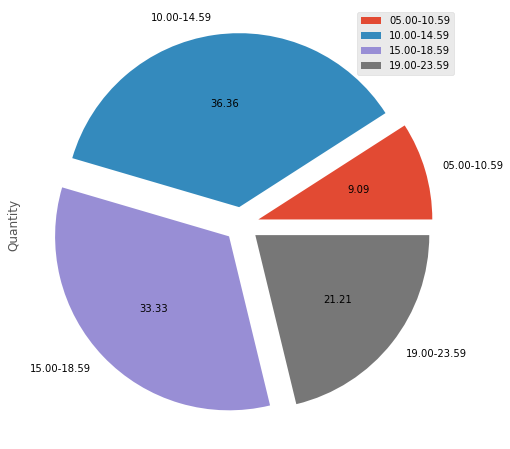

In [137]:
df_2= df.groupby(['waktu','minggu'],as_index=False).count()
### Pandas
df2=df_2[df_2['minggu']=='Weekend']
df2.plot.pie(y = 'Quantity', 
                  labels=df2['waktu'], 
                  figsize=(10,8), 
                  autopct='%.2f', 
                  explode=(0.1,0.1,0.1,0.1))
# plt.title("Average Total Bill per Day")
plt.show()

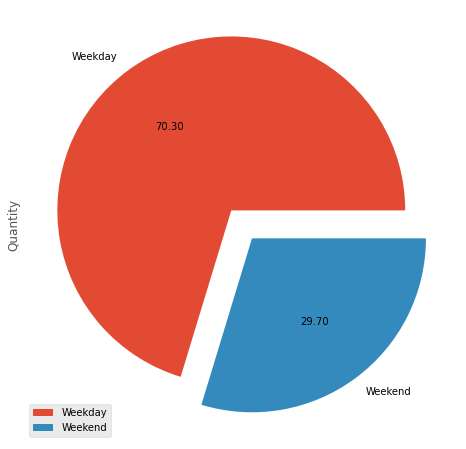

In [58]:
df_2= df.groupby('minggu',as_index=False).count()
### Pandas

df_2.plot.pie(y = 'Quantity', 
                  labels=df_2['minggu'], 
                  figsize=(10,8), 
                  autopct='%.2f', 
                  explode=(0.1,0.1))
# plt.title("Average Total Bill per Day")
plt.show()

### efisiensi kasi

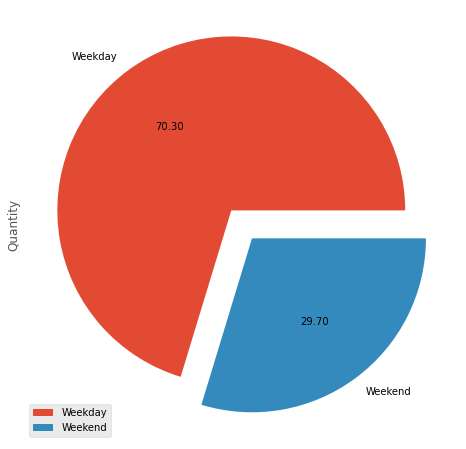

In [98]:
df_2= df.groupby('minggu',as_index=False).count()
### Pandas

df_2.plot.pie(y = 'Quantity', 
                  labels=df_2['minggu'], 
                  figsize=(10,8), 
                  autopct='%.2f', 
                  explode=(0.1,0.1))
plt.show()

##### insight 
- Transaksi banyak dilakukan di Siang dan sore hari dari
- Transaksi banyak dilakukan di Saat Hari kerja (weekday)

In [61]:
df.groupby('Product line',as_index=False).agg({'Rating':'mean'})

,Product line,Rating
0,Electronic accessories,6.924706
1,Fashion accessories,7.029213
2,Food and beverages,7.113218
3,Health and beauty,7.003289
4,Home and lifestyle,6.837500
5,Sports and travel,6.916265


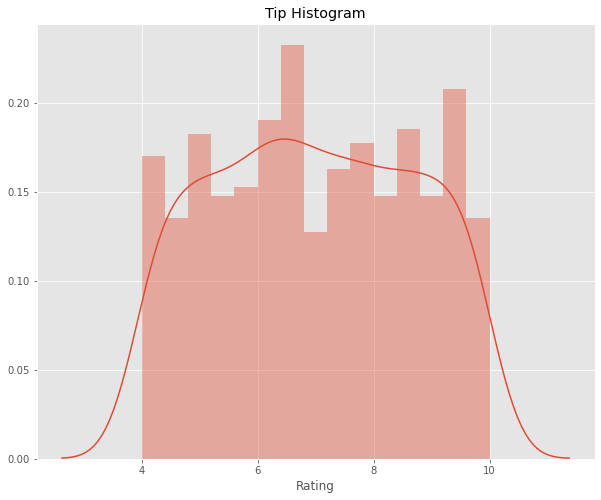

In [62]:
plt.figure(figsize=(10,8))
sns.distplot(df['Rating'], bins=15)
plt.title("Tip Histogram")
plt.show()

#### insight 
##### Jika rating 1-3 dianggap kurang, 4-5 dianggap cukup, 6-7 dianggap cukup baik, 8-10 dianggap baik
maka rata-rata rating disetiap produk masih bisa dikatakan cukup baik

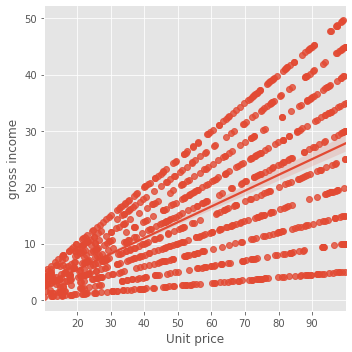

In [108]:
sns.lmplot(x ="Unit price", y = "gross income", data=df)
plt.show()

In [106]:
df.columns

Index(['Branch', 'City', 'Customer type', 'Gender', 'Product line',
       'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date', 'Time', 'Payment',
       'cogs', 'gross margin percentage', 'gross income', 'Rating', 'month',
       'date', 'name_day', 'hour', 'waktu', 'minggu'],
      dtype='object')

In [123]:
pd.crosstab(index=df['Customer type'],columns='jumlah')

col_0,jumlah
Customer type,
Member,501
Normal,499


### KESIMPULAN

1. Total product yang terjual di tahun 2019 bulan Januari-Maret adalah 5510 unit
2. Jumlah transaksi dan kuantitas barang yang terjual paling tinggi di Cabang A
3. Cabang C memiliki jumlah gross_income yang tertinggi
4. Untuk Customer type member dan normal tidak terjadi perbedaan yang significant dalam jumlah transaksi
5. Transaksi yang dilakukan di cabang A dan B lebih banyak dilakukan oleh bergender Male
6. Transaksi yang dilakukan di cabang C lebih banyak dilakukan oleh bergender female
7. 51.98% dari total gross income dari gender female ( 27.3% Member, 24.68% Normal)
8. Di seluruh cabang supermarket, customer yang bertipe member atau normal dan bergender Female memang lebih konsumif dibanding Male
9. Produk yang paling banyak dibeli adalah kategori `Electronic Acc` dan yang paling sedikit `Health and beauty`
10. jumlah `gross income` paling banyak di dapat dari kategori `food and baverages` sejumlah 2673.5640
11. Perbedaan penjualan antar produk tidak terlalu sginificant yaitu sehingga bs dikatakan merata berdasarkan QTY
12. Rata-rata harga paling mahal ada di ketgori `Fashion Accessories`
13. Hampir di setiap kategori jumlah produk paling banyak dibeli oleh gender Female, kecuali `Health and beauty` paling banyak dibeli oleh gender male.
14. Customer lebih banyak membayar menggunakan Ewallet dan cash dibanding CC
    - Cust lebih banyak menggunakan `Cash` untuk membeli produk `Electronic Acc` dan `Sports and travel`
    - Cust lebih banyak menggunakan `Ewallet` untuk membeli produk `Health and beauty`,`Home and lifestyle`, and `Fashion Accessories`
    - Cust lebih banyak menggunakan ` CC` untuk membeli produk `Food and beverages`
15. keenam kategori produk memiliki polayang berbeda:
    1. Electronic cenderung stabil
    2. Health n beauty cenderung meningkat
    3. Hme&lifestyle, sport travel memiliki pola yang sama
    4. Fashion Acc cenderung menurun
    5. FnB kebalikan dengan HMEdan lifestyle
16. Transaksi banyak dilakukan di Siang dan sore hari dari dan Transaksi banyak dilakukan di Saat Hari kerja (weekday) karena lokasi supermarket berada di daerah perkantoran
18. Rata-rata rating disetiap produk masih bisa dikatakan cukup baik

### SARAN/REKOMENDASI

1. Tingkatkan privilage yang diberikan kepada customer type member, sehingga bisa meningkatkan jumlah member. Dapat dilihat dari data Transaksi oleh Member dan normal cenderung sama hal ini mungkin disebabkan kurangnya privillage yg diberikan kepada customer type member.
    Privilage yang diberikan bisa berupa point tiap transaksi yang dapat dikumpulkan/ditukar pada lain hari, voucher belanja, penawaran khusus lainnya. hal ini juga bisa meningkatkan nilai rating tiap produk
2. Jika ingin memberikan promo menarik bisa dilakukan di saat weekday dan saat siang dan sore hari.
3. Berikan promo fashion ACC karena penjualan cenderung menurun hal ini diperkirakan karena harga Fashion ACC merupakan yang termahal. 
4. Mengefisiensi kan jumlah kasir.

#### SIMULASI

In [110]:
7820.164/15379.368999999999

0.5084840606919568

Pembelian rata2 customer member adalah 15.6 kyat. Total gross income member adalah 7820 dengan memberi voucher mungkin dapat menurunkan keuntungan namun tujuan kita disini adalah untuk `meningkatkan angka member baru` dan `mempertahankan loyalitas pelanggan lama` sehingga dapat `mengingkatkan angka penjualan` dan juga `menghabiskan stok barang`.

In [138]:
### harusnya da efisiensi kasir nih disini..